In [1]:
using Plots
using LaTeXStrings
using PyPlot

# Examen 3
## Física Computacional
### Aquino Chapa Martha Abril
Hecho en Julia 🔴🟢🟣

####  Encuentra la solución numérica para la ecuación diferencial $∇^{2}φ=0$ en dos dimensiones con condiciones
a la frontera φ(0, y) = φ(x, 0) = φ(1, y) = φ(x, 1) = 0 y φ = 1 para todos los puntos x, y en dos círculos
de radio 1/4 con centros en (0.4, 0.5) y (0.6, 0.5).

In [4]:
function Malla_circ2(x,y,r,V_0=1.0)
    Mat=zeros(length(x),length(y))
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            if sqrt((x[j]-0.4)^2+(y[i]-0.5)^2 )<=r || sqrt((x[j]-0.6)^2+(y[i]-0.5)^2 )<=r
                Mat[i,j]=V_0
            else
                Mat[i,j] = rand()
            end
        end
    end
    return Mat
end 

Malla_circ2 (generic function with 2 methods)

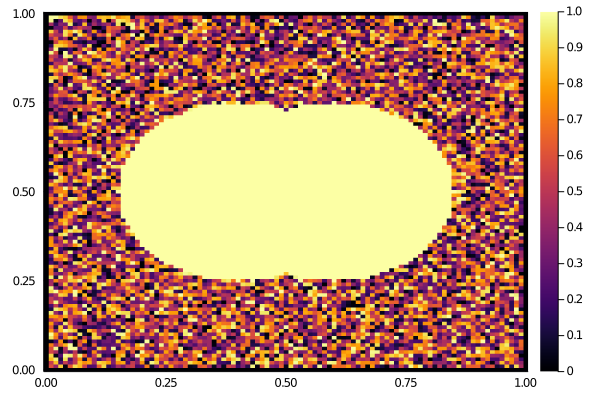

In [5]:
x=collect(0:0.01:1)
y=collect(0:0.01:1)
mi_malla=Malla_circ2(x,y,0.25)
heatmap(x,y,mi_malla)

In [6]:
function relax(Mat,V_0=1.0)
    for i in 2:length(y)-1
        for j in 2:length(x)-1
            if Mat[i,j] !=V_0
                Mat[i,j]=0.25(Mat[i+1,j]+Mat[i-1,j]+Mat[i,j+1]+Mat[i,j-1])
            end
        end
    end
    return Mat
end

relax (generic function with 2 methods)

In [7]:
function met_jacobi(Mat,error=1e-5)
    testigo,cuenta=true,0
    while testigo==true
        Mat_old=copy(Mat)
        Mat=relax(Mat)
        cuenta+= 1
        if maximum(abs.(Mat .- Mat_old))<=error
            testigo=false
        end
    end
    return Mat,cuenta
end

met_jacobi (generic function with 2 methods)

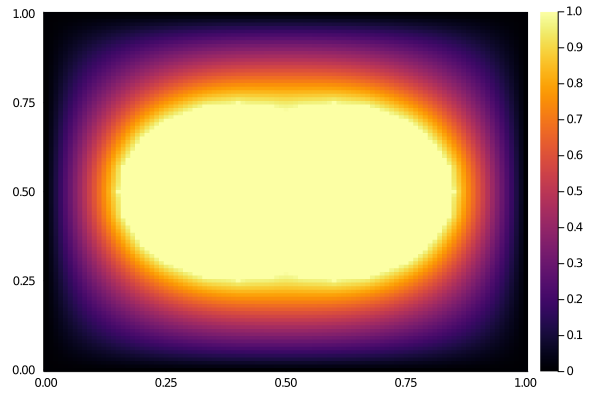

In [10]:
x1=collect(0:0.01:1)
y1=collect(0:0.01:1)
ϕ=Malla_circ2(x1,y1,0.25)
ϕ,num=met_jacobi(ϕ)
heatmap(x1,y1,ϕ)

Obteniendo las equipotenciales:

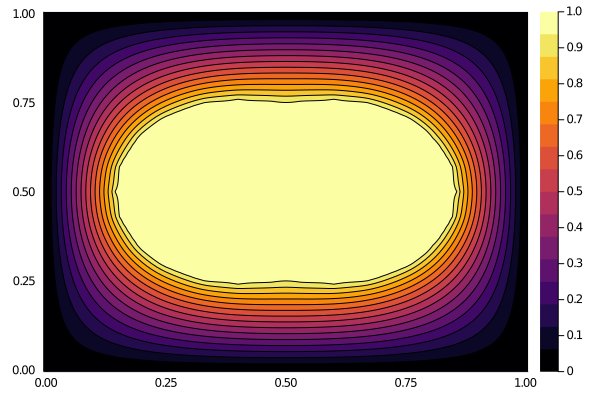

In [12]:
contourf!(x1,y1,ϕ)

Para obtener el campo eléctrico es necesario definir una función que nos regrese el gradiente, debido a que estamos haciendo uso de coordenadas cartesianas y de dos variables restrigiré a esas variables la función.

In [17]:
function grad(x,y,Mat)
    grad=zeros(length(x),2)
    for i in 2:length(x)-1
        for j in 2:length(y)-1
        #parcial respecto a x
            grad[i,1]=(Mat[i+1,i+1]-Mat[i-1,i-1])/(x[i]-x[i-1])
        #parcial respecto a y
            grad[i,2]=(Mat[i+1,i+1]-Mat[i-1,i-1])/(y[i]-y[i-1])
        end
    end
    return grad
end

grad (generic function with 1 method)

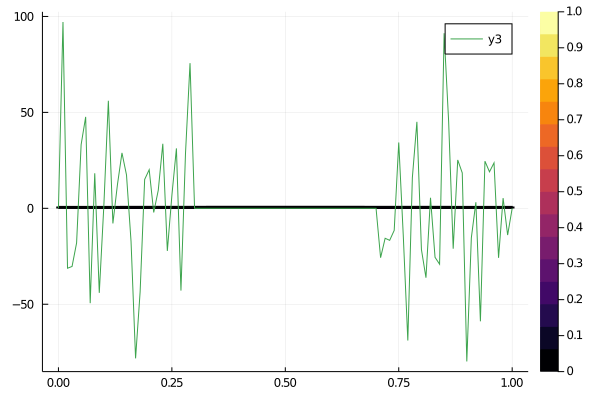

In [28]:
x1=collect(0:0.01:1)
y1=collect(0:0.01:1)
ϕ=Malla_circ2(x1,y1,0.25)
E_x=grad(x1,y1,ϕ)[:,2]
E_y=grad(x1,y1,ϕ)[:,2]
#X,Y = meshgrid(x,y)
plot!(x1, E_x)#, color=(.75,.90,.93))


In [ ]:
#Gradiente
function gradiente(x,v)
    grad=zeros(length(v),length(v))
    #hacemos un ciclo donde iremos llenando las entradas de nuestra matriz.
    for i in 1:length(func(xi,t)), j in 1:length(xi)
        #Definiremlos los vetores xp1 y xp2, como los vectores que tiene un aumento o desaumento en la i-ésima entrda.
        xp1=zeros(length(xi))
        xp2=zeros(length(xi))
        #Creamos un ciclo con el cual definiremos las entradas de los vectores donde evaluaremos la función para obtener la derivada parcial
        for k in 1:length(xi)
            #Aqui sólo agregamos el incremento a la j-ésima entrada del vector
            if  k==j 
                xp1[k]=xi[j]+h
                xp2[k]=xi[j]-h
            else
                #Dejamos todas las demás entradas igual
                xp1[k]=xi[j]
                xp2[k]=xi[j]
            end
        end
        #Definimos la entrada ij de la matriz jacobiana, sin tomar en cuenta la entrada de la parcial temporal
        jac[i,j]=(func(xp1,t)[i]-func(xp2,t)[i])/(xp1[j]-xp2[j])
        #definimos las componentes de la columna de la parcial temporal
        jac[i,length(xi)+1]=(func(xi,t+h)[i]-func(xi,t-h)[i])/(2h)
    end
    return jac
end